# HW 2 - 1D Cellular Automata
Please submit the modified file as your completed homework. Name the file firstname_lastname-HW2.ipynb

As we discussed even these very abstract models can be used to simulate real biological systems. The excercises today are an attempt to get you to a place where you are representing a real system in a simulation for the first time.

Don't forget to comment your code!


## Excercise 1
Implement a 1 D cellular automata as was described in the lecture and demonstrate a rule-set configuration that displays complexity. In a comment justify why you think that particular configuration constitutes a "complex" result. 

Text(0.5, 0, 'Position in the Universe')

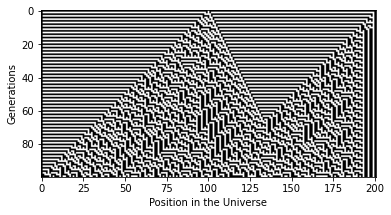

In [101]:
import random as rd 
import numpy as np 
import matplotlib.pyplot as plt

def rules(left, home, right, config):    
     if (left == 0) & (home == 0) & (right == 0):
        return config[0]
     if (left == 0) & (home == 0) & (right == 1):
        return config[1]
     if (left == 0) & (home == 1) & (right == 0):
        return config[2]
     if (left == 0) & (home == 1) & (right == 1):
        return config[3]
     if (left == 1) & (home == 0) & (right == 0):
        return config[4]
     if (left == 1) & (home == 0) & (right == 1):
        return config[5]
     if (left == 1) & (home == 1) & (right == 0):
        return config[6]
     if (left == 1) & (home == 1) & (right == 1):
        return config[7]
    
def generate(universe, config):
    
    newuniverse = np.zeros((1,universe.size)) #a container to store output 
    
    #build a loop that allows us to apply rules to every neighborhood 
    
    for i in np.arange(universe.size):
        if (i != 0) & (i != universe.size-1):
            left = universe[0,i-1]
            home = universe[0,i]
            right = universe[0,i+1]
            
            newuniverse[0,i] = rules(left, home, right, config)
            
    return newuniverse

def num2binArray(num):
    binstr = np.binary_repr(num, width=8) #binary string 
    
    binArray = np.empty(0) #make an empty array 
    
    for i in binstr:
        binArray = np.append(binArray, int(i)) #converting each ith element to an int and putting it into the array
        
    return np.flip(binArray) #return the flipped version 



t = 100 # number of generations 

#use our num2bin function to generate the config 
config = num2binArray(101) # <-- changing this will change the class 

#Define universe 
universe = np.zeros((1,201))
universe[0,100] = 1

#start with a memory or history of object 
stateMemory = np.zeros((t ,universe.size)) #t = length of number of generation

for i in range(t):
    stateMemory[i,:] = universe
    newuniverse = generate(universe, config)
    universe = newuniverse
    
plt.imshow(stateMemory, cmap = 'gray')
plt.ylabel("Generations")
plt.xlabel("Position in the Universe")

## Excercise 2

Alter the `generate` function so that you have "wrap around" boundary conditions. Meaning that the left most cell uses the right most cell as its 'left' and the right most cell uses the left most cell as its 'right'.

Show an example of a configuration where the boundary conditions change the result and also one where they do not.

### Solution: 
* A config where the boundary conditions change the result = 101
* Config where boundary conditions do NOT = 30

Text(0.5, 0, 'Position in the Universe')

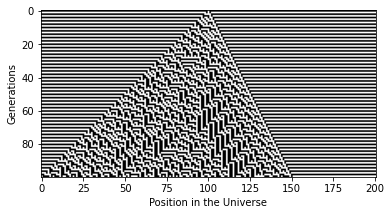

In [102]:
    
def generate(universe, config):
    
    newuniverse = np.zeros((1,universe.size)) #a container to store output 
    
    #build a loop that allows us to apply rules to every neighborhood 
    
    for i in np.arange(universe.size):
        if (i == 0):
            left = universe[0,universe.size-1]
            home = universe[0,i]
            right = universe[0,i+1]
        elif (i == universe.size-1):
            left = universe[0,i -1]
            home = universe[0,i]
            right = universe[0,0]
        else:
            left = universe[0,i-1]
            home = universe[0,i]
            right = universe[0,i+1]
            
        newuniverse[0,i] = rules(left, home, right, config)
            
    return newuniverse

def num2binArray(num):
    binstr = np.binary_repr(num, width=8) #binary string 
    
    binArray = np.empty(0) #make an empty array 
    
    for i in binstr:
        binArray = np.append(binArray, int(i)) #converting each ith element to an int and putting it into the array
        
    return np.flip(binArray) #return the flipped version 



t = 100 # number of generations 

#use our num2bin function to generate the config 
config = num2binArray(101) # <-- changing this will change the class 

#Define universe 
universe = np.zeros((1,201))
universe[0,100] = 1

#start with a memory or history of object 
stateMemory = np.zeros((t ,universe.size)) #t = length of number of generation

for i in range(t):
    stateMemory[i,:] = universe
    newuniverse = generate(universe, config)
    universe = newuniverse
    
plt.imshow(stateMemory, cmap = 'gray')
plt.ylabel("Generations")
plt.xlabel("Position in the Universe")  

## Excercise 3

With wrap-around boundary conditions simulate rule 30 on a universe of width 1001 for 1000 generations. What will the central cell (500th) be on the 1001 generation? Comment on if there is any way that you could tell without running the simulation. 

#### Answer: 
The 500th cell on the 1001 generation would be a 1 because given that we have wrap-around boundary conditions, then there is a tendency for the script to skew towards the middle -- producing "1s" in the middle. 

Text(0.5, 0, 'Position in the Universe')

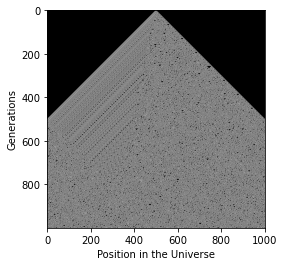

In [103]:
def generate(universe, config):
    
    newuniverse = np.zeros((1,universe.size)) #a container to store output 
    
    #build a loop that allows us to apply rules to every neighborhood 
    
    for i in np.arange(universe.size):
        if (i == 0):
            left = universe[0,universe.size-1]
            home = universe[0,i]
            right = universe[0,i+1]
        elif (i == universe.size-1):
            left = universe[0,i -1]
            home = universe[0,i]
            right = universe[0,0]
        else:
            left = universe[0,i-1]
            home = universe[0,i]
            right = universe[0,i+1]
            
        newuniverse[0,i] = rules(left, home, right, config)
            
    return newuniverse

def num2binArray(num):
    binstr = np.binary_repr(num, width=8) #binary string 
    
    binArray = np.empty(0) #make an empty array 
    
    for i in binstr:
        binArray = np.append(binArray, int(i)) #converting each ith element to an int and putting it into the array
        
    return np.flip(binArray) #return the flipped version 



t = 1000 # number of generations  

#use our num2bin function to generate the config 
config = num2binArray(30) # <-- changing this will change the class 

#Define universe 
universe = np.zeros((1,1001))
universe[0,500] = 1

#start with a memory or history of object 
stateMemory = np.zeros((t ,universe.size)) #t = length of number of generation

for i in range(t):
    stateMemory[i,:] = universe
    newuniverse = generate(universe, config)
    universe = newuniverse
    
plt.imshow(stateMemory, cmap = 'gray')
plt.ylabel("Generations")
plt.xlabel("Position in the Universe")

## Excercise 4
Predator-prey dynamics can be modeled using CA. 
Make a model of predator-prey interactions with 3 states. 0 is empty space, 1 is rabbits, and 2 is foxes. 

Hint: With three states there should 3^3 = 27 neighborhoods. 

Design your rule-set such that paired rabbits multiply, foxes next to rabbits eat the rabbits and become more foxes, isolated rabbits live, isolated foxes die. Run the simulation for 100 timpoints over a universe that is length 100 starting with random initial conditions. Who wins? 

For prettier simulations try any of the following colormaps in cmap argument: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'

For example:


`plt.imshow(stateMemory, cmap = 'magma')`


Text(0.5, 0, 'Position in Nature')

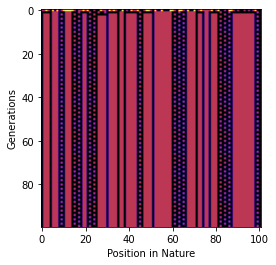

In [104]:
import random as rd 
import numpy as np 
import matplotlib.pyplot as plt

def nature_rules(left, home, right, config):
    if ((left == 0) & (home == 0) & (right == 0)):
        return config[0]
    if ((left == 0) & (home == 0) & (right == 1)):
        return config[1]
    if ((left == 0) & (home == 0) & (right == 2)):
        return config[0]
    if ((left == 0) & (home == 1) & (right == 0)):
        return config[1]
    if ((left == 0) & (home == 1) & (right == 1)):
        return config[2]
    if ((left == 0) & (home == 1) & (right == 2)):
        return config[3]
    if ((left == 1) & (home == 1) & (right == 0)):
        return config[2]
    if ((left == 0) & (home == 2) & (right == 0)):
        return config[0]
    if ((left == 0) & (home == 2) & (right == 1)):
        return config[3]
    if ((left == 0) & (home == 2) & (right == 2)):
        return config[0]
    if ((left == 1) & (home == 0) & (right == 0)):
        return config[1]
    if ((left == 1) & (home == 0) & (right == 1)):
        return config[1]
    if ((left == 1) & (home == 0) & (right == 2)):
        return config[1]
    if ((left == 1) & (home == 1) & (right == 0)):
        return config[2]
    if ((left == 1) & (home == 1) & (right == 1)):
        return config[2]
    if ((left == 1) & (home == 1) & (right == 2)):
        return config[3]
    if ((left == 1) & (home == 2) & (right == 0)):
        return config[3]
    if ((left == 1) & (home == 2) & (right == 1)):
        return config[3]
    if ((left == 1) & (home == 2) & (right == 2)):
        return config[3]
    if ((left == 2) & (home == 0) & (right == 0)):
        return config[0]
    if ((left == 2) & (home == 0) & (right == 1)):
        return config[1]
    if ((left == 2) & (home == 0) & (right == 2)):
        return config[0]
    if ((left == 2) & (home == 1) & (right == 0)):
        return config[3]
    if ((left == 2) & (home == 1) & (right == 1)):
        return config[3]
    if ((left == 2) & (home == 1) & (right == 2)):
        return config[3]
    if ((left == 2) & (home == 2) & (right == 0)):
        return config[0]
    if ((left == 2) & (home == 2) & (right == 1)):
        return config[3]
    if ((left == 2) & (home == 2) & (right == 2)):
        return config[0]


    
def generate(nature, config):
    
    new_nature = np.zeros((1,nature.size)) #a container to store output 
    
    #build a loop that allows us to apply rules to every neighborhood 
    
    for i in np.arange(nature.size):   # we are NOT using wrap-around conditions, because we want to simualte real life on a virtual field (this is NOT like pacman)
        if (i != 0) & (i != nature.size-1):
            left = nature[0,i-1]
            home = nature[0,i]
            right = nature[0,i+1]
            
            new_nature[0,i] = nature_rules(left, home, right, config)
            
    return new_nature

def num2binArray(num):
    binstr = np.binary_repr(num, width=28) #binary string 
    
    binArray = np.empty(0) #make an empty array 
    
    for i in binstr:
        binArray = np.append(binArray, int(i)) #converting each ith element to an int and putting it into the array
        
    return np.flip(binArray) #return the flipped version 



t = 100 # number of generations 

#use our num2bin function to generate the config 
config = num2binArray(101) # <-- changing this will change the class 

#Define universe & make random initial conditions
nature = np.random.randint(3, size = (1,101))

#start with a memory or history of object 
stateMemory = np.zeros((t ,nature.size)) #t = length of number of generation

for i in range(t):
    stateMemory[i,:] = nature
    new_nature = generate(nature, config)
    nature = new_nature
    
plt.imshow(stateMemory, cmap = 'inferno')
plt.ylabel("Generations")
plt.xlabel("Position in Nature") 

#### Solution: It appears that Foxes win the majority of times

## Extra Credit: Excercise 5 (not optional for Grad students)

Run the predator prey model except make the rule predation of rabbits by foxes and multiplication of rabbits and foxes a probabilistic event. E.g. Only 20% of foxes interacting with rabbits are successful. Can you find probabilities where foxes and rabbits appear to coexist?
